In [ ]:
!nvidia-smi
!/usr/local/cuda/bin/nvcc --version

Sun Aug  9 21:59:06 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    75W / 149W |   8429MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install tensorflow-gpu==2.1.0

     |████████████████████████████████| 421.8MB 29kB/s 
     |████████████████████████████████| 450kB 52.3MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 3.9MB 56.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=7484a9b77b6e1e050a1046e40e39839d1571f0cf650c4f1a497799d204765cf6
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

**Kagge 224**

In [ ]:
!wget --no-check-certificate \
  https://www.dropbox.com/s/aram63vt2i14xsb/chest_xray_224.zip?dl=0 \
  -O /tmp/chest_xray_224.zip

--2020-09-06 20:24:57--  https://www.dropbox.com/s/aram63vt2i14xsb/chest_xray_224.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/aram63vt2i14xsb/chest_xray_224.zip [following]
--2020-09-06 20:24:57--  https://www.dropbox.com/s/raw/aram63vt2i14xsb/chest_xray_224.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc94d538948f951cf8e1fcdb6423.dl.dropboxusercontent.com/cd/0/inline/A-5ynVRIRuPCGa-ZUkzfH9Hz8uJDkAy8pkwohJdIKHsUCNyenLydeFESyUODG85KqFN4tQNGk7K_r_j_OLNIf7yxIz-IJzQwGunD1YAhUa4-wz1aiKALjk_XeqzWeXuvx1g/file# [following]
--2020-09-06 20:24:57--  https://uc94d538948f951cf8e1fcdb6423.dl.dropboxusercontent.com/cd/0/inline/A-5ynVRIRuPCGa-ZUkzfH9Hz8uJDkAy8pkwohJdIKHsUCNyenLydeFESyUODG85KqFN4tQNGk7K_r_j_OLNIf7yxIz-

In [ ]:
import os
import zipfile

local_zip = '/tmp/chest_xray_224.zip'


zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:

base_dir = '/tmp/chest_xray_224'


train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_normal_dir = os.path.join(train_dir, 'NORMAL')
train_neumonia_dir = os.path.join(train_dir, 'PNEUMONIA')


# Directorio con las imagenes de validation
validation_normal_dir = os.path.join(validation_dir, 'NORMAL')
validation_neumonia_dir = os.path.join(validation_dir, 'PNEUMONIA')


# Directorio con las imagenes de test
test_normal_dir = os.path.join(test_dir, 'NORMAL')
test_neumonia_dir = os.path.join(test_dir, 'PNEUMONIA')

**Arquitectura ResNet 50 V2**


In [ ]:
import tensorflow as tf

pre_trained_model = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224,224,3),
    pooling=None,
)


**----MODELO----**

In [ ]:
modelFE = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(220, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])
#pre_trained_model.summary()

In [ ]:
modelFE.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 7, 7, 2048)        23564800  
_________________________________________________________________
flatten_3 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 220)               22077660  
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 442       
Total params: 45,642,902
Trainable params: 45,597,462
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

epochs=20
modelFE.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4), 
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
batch_size = 20

#train_datagen = ImageDataGenerator(
#      rescale=1./255,
#      rotation_range=40,
#      width_shift_range=0.2,
#      height_shift_range=0.2,
#      shear_range=0.2,
#      zoom_range=0.2,
#      horizontal_flip=True,
#      fill_mode='nearest')

train_datagen = ImageDataGenerator( rescale = None )
validation_datagen  = ImageDataGenerator( rescale = None )
test_datagen  = ImageDataGenerator( rescale = None )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=batch_size,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=batch_size,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))


Found 2714 images belonging to 2 classes.
Found 46 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

historyFE = modelFE.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 20, 
            validation_steps = validation_steps,
            verbose = 2)

Epoch 1/20
135/135 - 29s - loss: 0.1964 - acc: 0.9503 - val_loss: 0.7842 - val_acc: 0.9250
Epoch 2/20
135/135 - 29s - loss: 0.0708 - acc: 0.9800 - val_loss: 1.9069 - val_acc: 0.8500
Epoch 3/20
135/135 - 29s - loss: 0.0450 - acc: 0.9911 - val_loss: 0.7669 - val_acc: 0.9500
Epoch 4/20
135/135 - 29s - loss: 0.0385 - acc: 0.9937 - val_loss: 0.0064 - val_acc: 1.0000
Epoch 5/20
135/135 - 29s - loss: 0.0449 - acc: 0.9922 - val_loss: 0.3929 - val_acc: 0.9750
Epoch 6/20
135/135 - 29s - loss: 0.0288 - acc: 0.9937 - val_loss: 0.0619 - val_acc: 0.9750
Epoch 7/20
135/135 - 29s - loss: 0.0393 - acc: 0.9933 - val_loss: 0.5996 - val_acc: 0.9250
Epoch 8/20
135/135 - 29s - loss: 0.0393 - acc: 0.9929 - val_loss: 4.2177 - val_acc: 0.7250
Epoch 9/20
135/135 - 29s - loss: 0.0206 - acc: 0.9959 - val_loss: 0.0058 - val_acc: 1.0000
Epoch 10/20
135/135 - 29s - loss: 0.0312 - acc: 0.9948 - val_loss: 0.2505 - val_acc: 0.9750
Epoch 11/20
135/135 - 29s - loss: 0.0199 - acc: 0.9978 - val_loss: 0.0315 - val_acc: 0.97

In [ ]:
test_lost, test_acc= modelFE.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

Test Accuracy: 0.9086538553237915


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

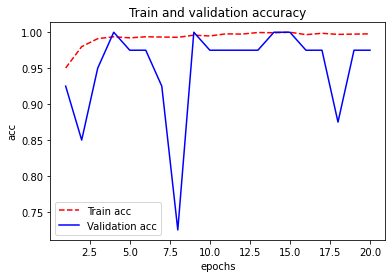

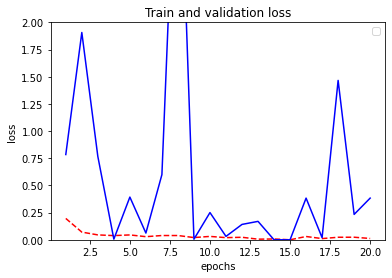

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

acc      = historyFE.history[     'acc' ]
val_acc  = historyFE.history[ 'val_acc' ]
loss     = historyFE.history[    'loss' ]
val_loss = historyFE.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

plt.plot  ( epochs,     acc, 'r--', label='Train acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Train and validation accuracy')
plt.ylabel('acc')

plt.xlabel('epochs')
plt.savefig("graficaacc.pdf", bbox_inches="tight")
plt.savefig("graficaacc.png", bbox_inches="tight")
plt.legend()
plt.figure()

plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Train and validation loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')
plt.ylim(0,2)
plt.savefig("graficaloss.pdf", bbox_inches="tight")
plt.savefig("graficaloss.png", bbox_inches="tight")
plt.legend()
plt.figure()


In [ ]:
print('val_acc: ', historyFE.history[ 'val_acc' ])
print('acc: ',historyFE.history[ 'acc' ])
print('Val_loss: ',historyFE.history[ 'val_loss' ])
print('loss: ',historyFE.history[ 'loss' ])

val_acc:  [0.925000011920929, 0.8500000238418579, 0.949999988079071, 1.0, 0.9750000238418579, 0.9750000238418579, 0.925000011920929, 0.7250000238418579, 1.0, 0.9750000238418579, 0.9750000238418579, 0.9750000238418579, 0.9750000238418579, 1.0, 1.0, 0.9750000238418579, 0.9750000238418579, 0.875, 0.9750000238418579, 0.9750000238418579]
acc:  [0.9502598643302917, 0.9799554347991943, 0.9910913109779358, 0.9936896562576294, 0.9922049045562744, 0.9936896562576294, 0.993318498134613, 0.9929472804069519, 0.9959168434143066, 0.994803249835968, 0.9977728128433228, 0.9974016547203064, 0.9996287822723389, 0.9992576241493225, 1.0, 0.9966592192649841, 0.998515248298645, 0.9970304369926453, 0.9974016547203064, 0.9977728128433228]
Val_loss:  [0.784199595451355, 1.9068517684936523, 0.7668889760971069, 0.006382206920534372, 0.39291077852249146, 0.06190957501530647, 0.5995733737945557, 4.217700958251953, 0.005755954422056675, 0.2504699230194092, 0.03145404905080795, 0.14151139557361603, 0.1695053875446319